<a href="https://colab.research.google.com/github/AdithyaMaddala/A-Deep-Dive-into-Walmart-s-Black-Friday-Sales/blob/main/WallMart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

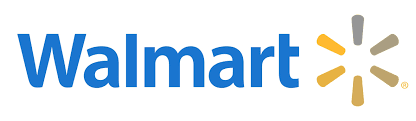

**Walmart** is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. **Walmart** has more than **100 million** customers worldwide.

#<font color='purple'>Business Problem

The Management team at Walmart Inc. wants to **analyze the customer purchase behavior** (specifically, purchase amount) against the **customer’s gender and the various other factors** to help the business make better decisions. They want to understand if the **spending habits differ between male and female** customers: **Do women spend more on Black Friday than men**? (Assume 50 million customers are male and 50 million are female).

In [ ]:
#re-run
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#<font color='purple'>Dataset
The company collected the **transactional data** of customers who **purchased** products from the **Walmart Stores** during **Black Friday Sale**

In [ ]:
#re-run
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

--2024-05-06 08:57:54--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.24, 13.224.9.103, 13.224.9.181, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv?1641285094’

walmart_data.csv?16 100%[===================>]  21.96M  97.4MB/s    in 0.2s    

2024-05-06 08:57:54 (97.4 MB/s) - ‘walmart_data.csv?1641285094’ saved [23027994/23027994]



In [ ]:
#re-run
df = pd.read_csv('walmart_data.csv?1641285094')
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422


#<font color='purple'>1. Defining Problem Statement and Analyzing basic metrics (10 Points)

<font color='blue'>1.1 Observations on **shape** of data, **data types** of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary


In [ ]:
print(f'Shape of WallMart data: {df.shape}\n'
      f'------------------------------------------------------------\n'
      f'The below table describes the datatypes of all the features')
df.dtypes

Shape of WallMart data: (550068, 10)
Min and max age groups of users:('0-17', '55+')
Min and max Purchase:(12, 23961)
------------------------------------------------------------
The below table describes the datatypes of all the features


User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
pd.crosstab(df.Gender,df.Age,margins=True,normalize=True)

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
Gender,,,,,,,,
F,0.009241,0.044773,0.092265,0.049394,0.023995,0.017987,0.009241,0.246895
M,0.018214,0.136405,0.306935,0.150605,0.059087,0.052006,0.029853,0.753105
All,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093,1.000000


In [ ]:
#insight
#p(male|purchased) = 0.75
#p(18-45 age purchased|male) = 0.58
#More than half of the purchases are done by males between the age 18-45 years
#The most obvious reason is they have more purchasing power as they are working adults

**<font color='blue'>1.2 Non-Graphical Analysis: Value counts and unique attributes**

In [ ]:
print('All features with number of unique items')
for i in df.columns:
  print(f'{i}:{df[i].nunique()}')

All features with number of unique items
User_ID:5891
Product_ID:3631
Gender:2
Age:7
Occupation:21
City_Category:3
Stay_In_Current_City_Years:5
Marital_Status:2
Product_Category:20
Purchase:18105


In [ ]:
print(df.Age.value_counts())
print('Most of the purchasing age of the users are between 26-45') #insight

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
Most of the purchasing age of the users are between 26-45


In [ ]:
print('Top 5 users with most accumulated purchases')
print(df.groupby(['User_ID'])['Purchase'].sum().sort_values(ascending=False).head(5))
print('----------------------------------------------')
print('Top 5 User_ID with most products purchased')
print(df.groupby(['User_ID'])['Product_ID'].nunique().sort_values(ascending=False).head(5))
print('----------------------------------------------')
print('Top 5 purchased product')
print(df.Product_ID.value_counts().sort_values(ascending=False).head(5))
print('----------------------------------------------')
print('The Number of unique users by gender')
print(df.groupby('Gender')['User_ID'].nunique())

Top 5 users with most accumulated purchases
User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
Name: Purchase, dtype: int64
----------------------------------------------
Top 5 User_ID with most products purchased
User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
Name: Product_ID, dtype: int64
----------------------------------------------
Top 5 purchased product
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: count, dtype: int64
----------------------------------------------
The Number of unique users by gender
Gender
F    1666
M    4225
Name: User_ID, dtype: int64


**<font color='blue'>1.3 Visual Analysis - Univariate & Bivariate**

**<font color='black'>1.3.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis**

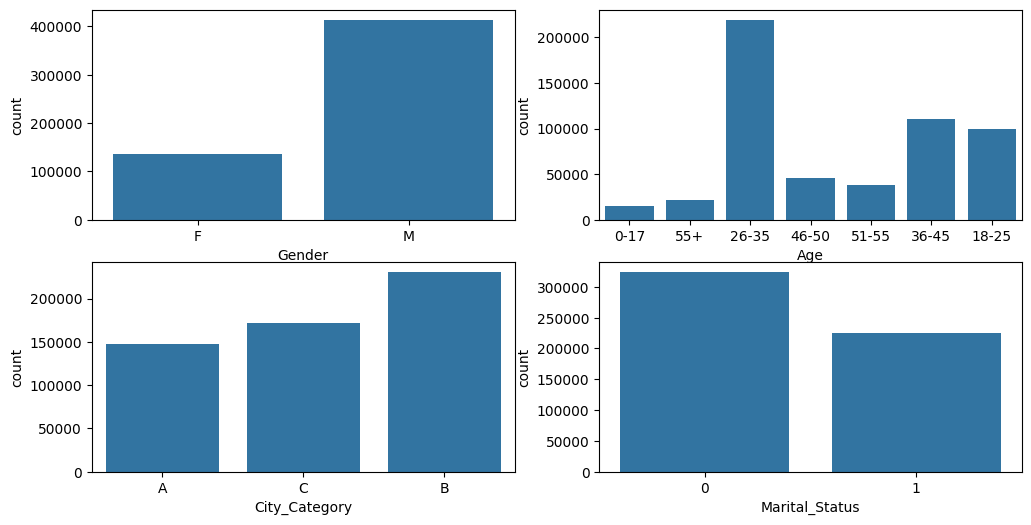

In [ ]:
cols = ['Gender','Age','City_Category','Marital_Status']
plt.figure(figsize=(12,6))
for i in range(len(cols)):
  plt.subplot(2,2,i+1)
  sns.countplot(x=df[cols[i]])

**<font color='black'>1.3.2 For categorical variable(s): Boxplot**

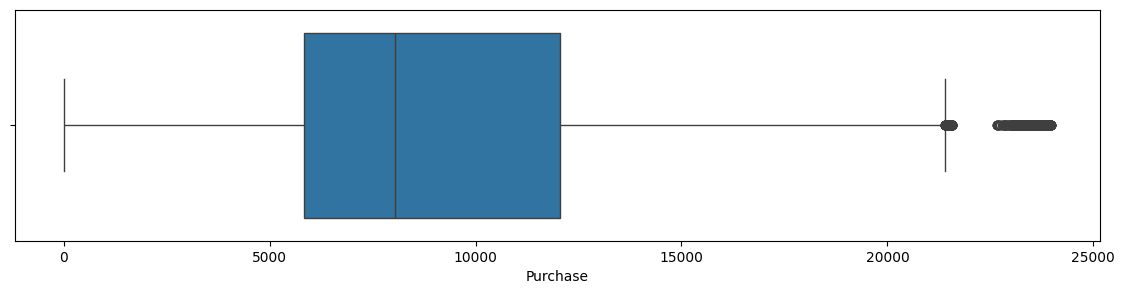

In [ ]:
plt.figure(figsize=(14,3))
sns.boxplot(x=df.Purchase)
plt.show()

**<font color='black'>1.3.3 For correlation: Heatmaps, Pairplots**

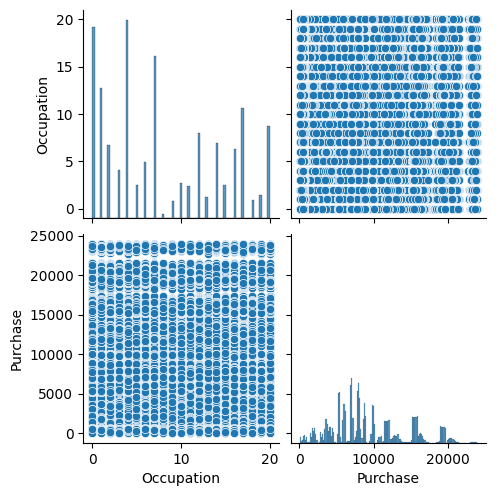

In [ ]:
sns.pairplot(data=df[['Occupation','Purchase']])
plt.show()

As the purchase column is continuous and occupation is discrete so there is actually no relationship between these attributes

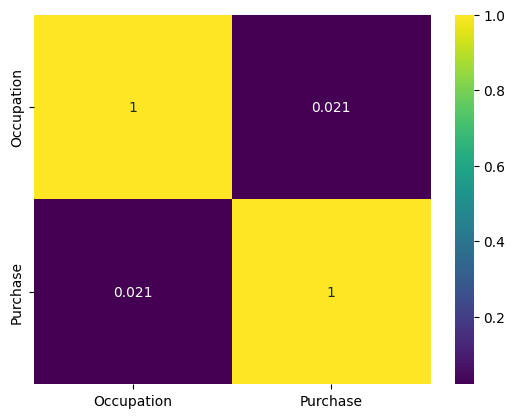

In [ ]:
sns.heatmap(df[['Occupation','Purchase']].corr(),cmap='viridis',annot=True)
plt.show()

In [ ]:
#insight
#No common relation between columns of wallmart data

#<font color='purple'>2. Missing Value & Outlier Detection (10 Points)

In [ ]:
#Total number of nulls
print(f'Total number of nulls present in df are {df.isna().sum().sum()}')

Total number of nulls present in df are 0


In [ ]:
def iqr(col): #small function for outlier detection
  Q1, Q2, Q3 = np.percentile(df[col],25), np.percentile(df[col],50), np.percentile(df[col],75)
  iqr = Q3 - Q1
  upper, lower = Q3 + 1.5 * iqr, Q3 - 1.5 * iqr
  outliers = len(df[col][df[col]> upper]) + len(df[col][df[col]< lower])
  print(f'Total number of outliers ({len(df[col][df[col]> upper])} + {len(df[col][df[col]< lower])}) for {col} is {outliers}')

iqr('Purchase')

Total number of outliers (2677 + 36971) for Purchase is 39648


Lets work on the outliers to remove them on a copy data

In [ ]:
#re-run
df_copy = df.copy()

In [ ]:
#re-run
#To remove outliers we are replacing the values below 5 percentile with
#5th percentile value and vice versa with 95 percentile and above
col = ['Purchase']
percentiles = df[col].quantile([0.05,0.95]).values
df_copy[col] = np.clip(df_copy[col],percentiles[0],percentiles[1])

In [ ]:
print(f'Maximum purchase amount before treating the outliers: {df.Purchase.max()}\n'
      f'Maximum purchase amount after treating the outliers: { df_copy.Purchase.max()}')

Maximum purchase amount before treating the outliers: 23961
Maximum purchase amount after treating the outliers: 19336


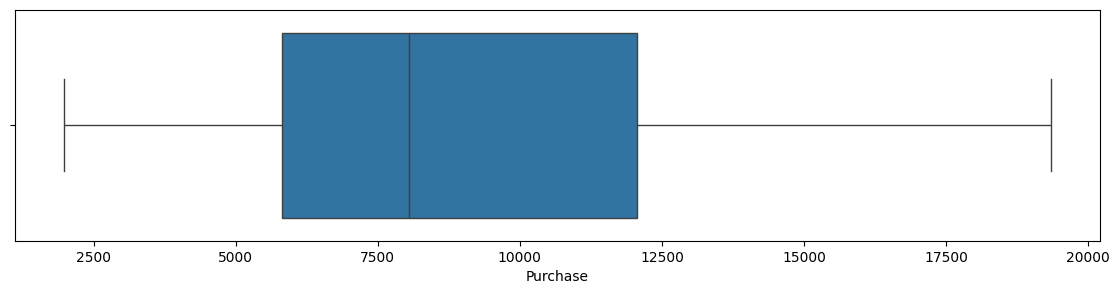

In [ ]:
plt.figure(figsize=(14,3))
sns.boxplot(x=df_copy.Purchase)
plt.show()

*After using np.clip function now the data is free from outliers*

#<font color='purple'>3. Business Insights based on Non- Graphical and Visual Analysis (10 Points)


**<font color='blue'>3.1 Comments on the range of attributes**

In [ ]:
print(f'Min and max age groups of users:{min(df_copy.Age),max(df_copy.Age)}\n'
      f'Min and max Purchase:{min(df_copy.Purchase),max(df_copy.Purchase)}\n'
      f'Min and max Occupation:{min(df_copy.Occupation),max(df_copy.Occupation)}\n'
      f'----------------------------------------------------------')
df.groupby('Gender')['Purchase'].agg(['min','max'])

Min and max age groups of users:('0-17', '55+')
Min and max Purchase:(1984, 19336)
Min and max Occupation:(0, 20)
----------------------------------------------------------


,min,max
Gender,,
F,12,23959
M,12,23961


**<font color='blue'>3.2 Comments on the distribution of the variables and relationship between them**

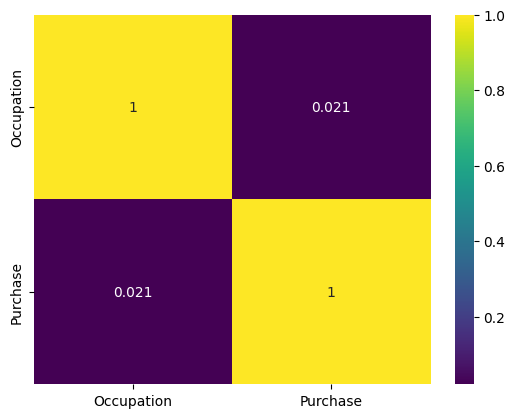

* Only purchase column has continuous numerical data to form a distribution and purchase attribute doesn't follow any particular distribution but by CLT method it follows normal distribution

*   There are no vital/strong relationships between attributes
*   All other attributes doesnot perform for correlation


**<font color='blue'>3.3 Comments for each univariate and bivariate plot**

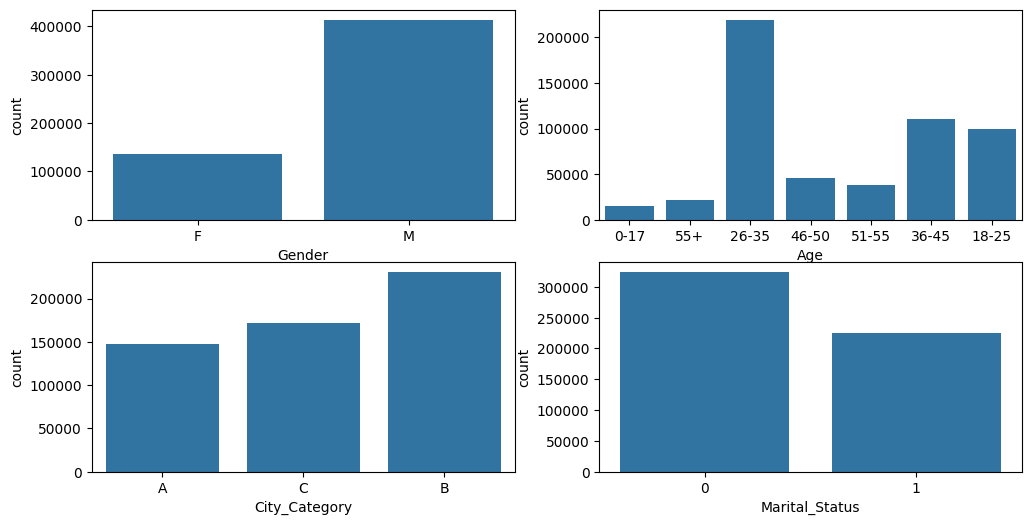

In [ ]:
df.groupby(['Marital_Status','Gender'])['Purchase'].sum()

Marital_Status  Gender
0               F          684154127
                M         2324773320
1               F          502078515
                M         1584806780
Name: Purchase, dtype: int64

In [ ]:
df.groupby('City_Category')['Purchase'].sum()

City_Category
A    1316471661
B    2115533605
C    1663807476
Name: Purchase, dtype: int64



*   Unanimously men dominate female on number of purchase made on black friday
*   Maximum number of customers lie in age group of 26-35
* Users of City B have done max purchases
* Unmarried users bought more then married users
* Unmarried women and men purchased more than married women and men


#<font color='purple'>4. Answering questions (50 Points)


#Q1.
**<font color='red'>Are women spending more money per transaction than men? Why or Why not? (10 Points)**

In [ ]:
#re-run
#creating seperate datas for male and female gender
df_female = df_copy[df_copy['Gender']=='F']
df_male = df_copy[df_copy.Gender=='M']

In [ ]:
print(f'Number of female orders are {df_female.Gender.count()}\n'
f'Number of male orders are {df_male.Gender.count()}\n'
f'Men:{round(df_male.Gender.count()*100/df.Gender.count(),2)}%, Women:{round (df_female.Gender.count()*100/df.Gender.count(),2)}%')

Number of female orders are 135809
Number of male orders are 414259
Men:75.31%, Women:24.69%


In [ ]:
#Average amount spent by men and women
df[df['Gender']=='M']['Purchase'].sum()/4225,df[df['Gender']=='F']['Purchase'].sum()/1666

(925344.4023668639, 712024.3949579832)

In [ ]:
df[df['Gender']=='M']['Purchase'].sum()

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

In [ ]:
df_male.User_ID.nunique(),df_female.User_ID.nunique()

(4225, 1666)

In [ ]:
#Average amount spent by men and women per transaction
df.groupby('Gender')['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [ ]:
#To reduce the coding for every test creating a function
def hypo_result():
  if p_val < significance:
    print('Reject H0, Conclusion:',Ha)
  else:
    print('Fail to reject H0, Conclusion:',H0)

In [ ]:
Case1 = 'Checking whether the average purchase made by men or women is same or not'
#Here Numerical Vs Categorical (2 Categories)---->T-Test is to be performed
H0 = 'Average purchase made by men and women on black friday is equal'
Ha = 'Average purchase made by men and women on black friday is not equal'
significance = 0.05 #default
print(f'Case1:{Case1}')
t_stat, p_val = stats.ttest_ind(df_female['Purchase'],df_male['Purchase'])
print(f't_stat:{t_stat}\n'f'p_val:{p_val}')
hypo_result()

Case1:Checking whether the average purchase made by men or women is same or not
t_stat:-45.574933432542736
p_val:0.0
Reject H0, Conclusion: Average purchase made by men and women on black friday is not equal


In [ ]:
#Lets check do women spend more on black friday
H0 = 'Average purchase made by men and women on black friday is equal.'
Ha = 'Average purchase made by women is greater than men on black friday.'
significance = 0.05 #default

t_stat, p_val = stats.ttest_ind(df_female['Purchase'],df_male['Purchase'],alternative='greater')
print(f't_stat:{t_stat}\n'
      f'p_val:{p_val}')
hypo_result()

t_stat:-45.574933432542736
p_val:1.0
Fail to reject H0, Conclusion: Average purchase made by men and women on black friday is equal.


In [ ]:
#Lets check do men spend more on black friday
H0 = 'Average purchase made by men and women on black friday is equal.'
Ha = 'Average purchase made by women is less than men on black friday.'
significance = 0.05 #default

t_stat, p_val = stats.ttest_ind(df_female['Purchase'],df_male['Purchase'],alternative='less')
print(f't_stat:{t_stat}\n'
      f'p_val:{p_val}')
hypo_result()

t_stat:-45.574933432542736
p_val:0.0
Reject H0, Conclusion: Average purchase made by women is less than men on black friday.


***Answer(4.1): From the above tests performed on women and men purchases we can conclude that men spent more than women in black friday sale on WallMart***

#Q2.
**<font color='red'>Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)**

<font color='blue'>To find confidence interval there are 2 methods: a. CLT, b.Bootstrapping

In [ ]:
df_copy['Purchase'].describe()

count    550068.000000
mean       9256.710489
std        4855.947166
min        1984.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       19336.000000
Name: Purchase, dtype: float64

<Axes: xlabel='Purchase', ylabel='Count'>

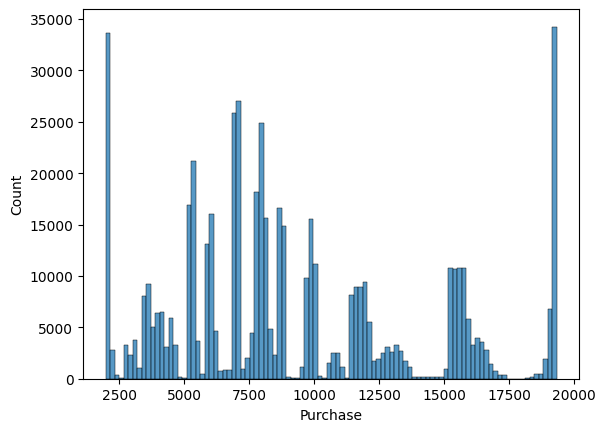

In [ ]:
sns.histplot(df_copy.Purchase, bins=100)
plt.show()

In [ ]:
#As we can see the data is absolutely not normal so lets perform CLT
#method on original data or copied data which is free from outliers
sample_5 = []
for i in range(10000):
  sample_5.append(np.mean(df.Purchase.sample(5)))

In [ ]:
sample_30 = []
for i in range(10000):
  sample_30.append(np.mean(df.Purchase.sample(30)))

In [ ]:
#To avoid the for loop the data has been downloaded as text file and it will be used for further analysis
sample_5 = np.array(sample_5)
with open("file.txt", "w") as output:
    output.write(str(sample_5))

In [ ]:
print(f'Length of sample_5 data is {len(sample_5)}\n'
      f'Mean of sample_5 data is {round(np.mean(sample_5),2)}\n'
      f'Standard deviation of sample_5 data is {round(np.std(sample_5),2)}')

Length of sample_5 data is 10000
Mean of sample_5 data is 9293.35
Standard deviation of sample_5 data is 2256.34


In [ ]:
#re-run
!gdown 1zX0RrBGV98aSybL-n1LC6nMLhDp6Mti9
sample_5 = np.loadtxt('/content/sample_5.txt',delimiter=',',dtype='str')
sample_5 = sample_5.astype('float')
sample_5 = pd.Series(sample_5)
sample_5.head()

Downloading...
From: https://drive.google.com/uc?id=1zX0RrBGV98aSybL-n1LC6nMLhDp6Mti9
To: /content/sample_5.txt
100% 83.7k/83.7k [00:00<00:00, 85.0MB/s]


0    6149.6
1    9403.2
2    8474.2
3    9990.6
4    8261.6
dtype: float64

<Axes: ylabel='Count'>

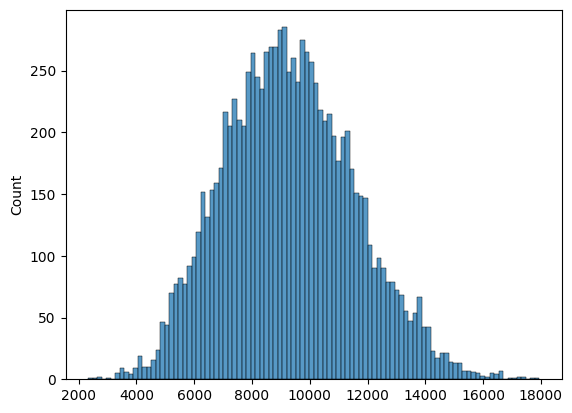

In [ ]:
#lets check whether the sample data follows normal distribution
sns.histplot(sample_5,bins=100)
plt.show()

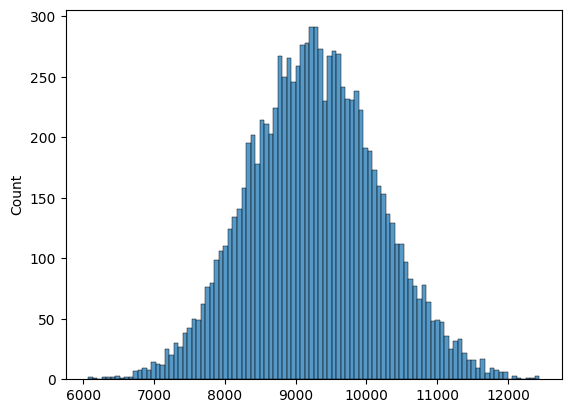

In [ ]:
sns.histplot(sample_30,bins=100)
plt.show()

In [ ]:
confidence = 0.95
mu = sample_5.mean()
std_dev = sample_5.std()
n = 5
std_error = std_dev/n**0.5

In [ ]:
x1,x2 = stats.norm.interval(confidence=confidence,loc=mu,scale=std_error)

In [ ]:
print(f'{int(confidence*100)} out of 100 times user purchases lies between {(x1, x2)}')

95 out of 100 times user purchases lies between (7315.511388130137, 11271.180251869864)


In [ ]:
print('For 30 sample CLT')
confidence = 0.95
mu = np.mean(np.array(sample_30))
std_dev = np.std(np.array(sample_30))
n = 5
std_error = std_dev/n**0.5
x1,x2 = stats.norm.interval(confidence=confidence,loc=mu,scale=std_error)
print(f'{int(confidence*100)} out of 100 times user purchases lies between {(x1, x2)}')

For 30 sample CLT
95 out of 100 times user purchases lies between (8458.073193663051, 10064.661319670282)


***(Answer 4.2): From the above sample_5 and sample_30 there is a quite big differece in the range***

***So from the above 2 samples we can say that by increasing the sample size confidence interval minimizes***

#Q3.
**<font color='red'>Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? (10 Points)**

In [ ]:
sample_5_female = []
for i in range(10000):
  sample_5_female.append(np.mean(df_female.Purchase.sample(5)))

In [ ]:
sample_5_male = []
for i in range(10000):
  sample_5_male.append(np.mean(df_male.Purchase.sample(5)))

In [ ]:
# Save the list to a text file (one element per line)
with open('sample_5_female.txt', 'w') as file:
    for item in sample_5_female:
        file.write(str(item) + ',')

In [ ]:
# Save the list to a text file (one element per line)
with open('sample_5_male.txt', 'w') as file:
    for item in sample_5_male:
        file.write(str(item) + ',')

<Axes: ylabel='Count'>

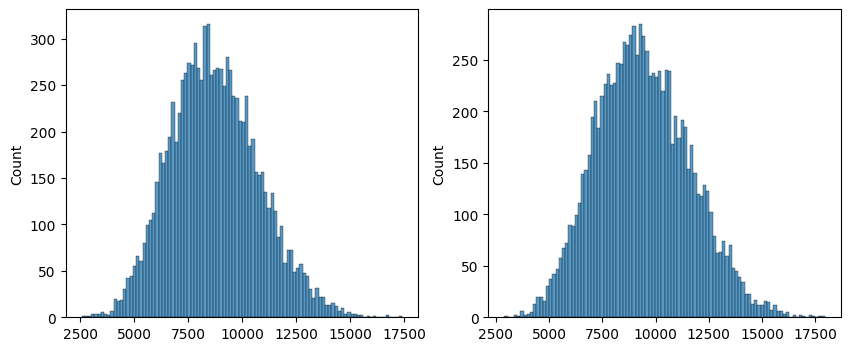

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(sample_5_female,bins=100)
plt.subplot(1,2,2)
sns.histplot(sample_5_male,bins=100)

In [ ]:
#re-run
!gdown 1HSwaUCEjraC6yudY9s5k4QdXNMhfmaZa
sample_5_female = np.loadtxt('/content/sample_5_female.txt',delimiter=',',dtype='str')
sample_5_female = sample_5_female[:-1] #last row has some issue
sample_5_female = sample_5_female.astype('float')
sample_5_female = pd.Series(sample_5_female)
sample_5_female.head()

0     7247.2
1     7951.0
2     7542.0
3    11460.6
4     8597.6
dtype: float64

In [ ]:
print('Female confidence Interval:')
confidence = 0.95
mu = sample_5_female.mean()
std_dev = sample_5_female.std()
n = 5
std_error = std_dev/n**0.5
x1,x2 = stats.norm.interval(confidence=confidence,loc=mu,scale=std_error)
print(f'{int(confidence*100)} out of 100 times user purchases lies between {(round(x1,2), round(x2,2))}')

Female confidence Interval:
95 out of 100 times user purchases lies between (6915.63, 10563.7)


In [ ]:
#re-run
!gdown 1i79h36pLoOs2uPnAJwxjMGJzxRK1I0Xw
sample_5_male = np.loadtxt('/content/sample_5_male.txt',delimiter=',',dtype='str')
sample_5_male = sample_5_male[:-1]
sample_5_male = sample_5_male.astype('float')
sample_5_male = pd.Series(sample_5_male)
sample_5_male.head()

Downloading...
From: https://drive.google.com/uc?id=1i79h36pLoOs2uPnAJwxjMGJzxRK1I0Xw
To: /content/sample_5_male.txt
100% 73.8k/73.8k [00:00<00:00, 83.6MB/s]


0     5694.6
1    10578.2
2     7018.2
3    11059.6
4     8388.0
dtype: float64

In [ ]:
print('Male confidence Interval:')
confidence = 0.95
mu = sample_5_male.mean()
std_dev = sample_5_male.std()
n = 5
std_error = std_dev/n**0.5
x1,x2 = stats.norm.interval(confidence=confidence,loc=mu,scale=std_error)
print(f'{int(confidence*100)} out of 100 times user purchases lies between {(round(x1,2), round(x2,2))}')

Male confidence Interval:
95 out of 100 times user purchases lies between (7462.64, 11330.36)


***(Answer-4.3): Female confidence interval is lying in male confidence interval. An average individual spending limit is more than 6900 where this is huge but this can be increased if males are more attracted by their offers not directly on the product but if they provide an offer like buy more get more***

***WallMart should levarage this oppourtunity in other sales by focussing on male customers over female customers***

***Note: If we would have the data regarding the type of product then it would be more sufficient data to analyse which type of products are being purchased by male customers***

#Q4.
**<font color='red'>Results when the same activity is performed for Married vs Unmarried (10 Points)**

In [ ]:
df_unmarried = df_copy[df_copy['Marital_Status']==0]
df_married = df_copy[df_copy['Marital_Status']==1]

In [ ]:
sample_5_unmarried = []
for i in range(10000):
  sample_5_unmarried.append(np.mean(df_unmarried.Purchase.sample(5)))

sample_5_married = []
for i in range(10000):
  sample_5_married.append(np.mean(df_married.Purchase.sample(5)))

In [ ]:
sample_30_unmarried = []
for i in range(10000):
  sample_30_unmarried.append(np.mean(df_unmarried.Purchase.sample(30)))

sample_30_married = []
for i in range(10000):
  sample_30_married.append(np.mean(df_married.Purchase.sample(30)))

<Axes: ylabel='Count'>

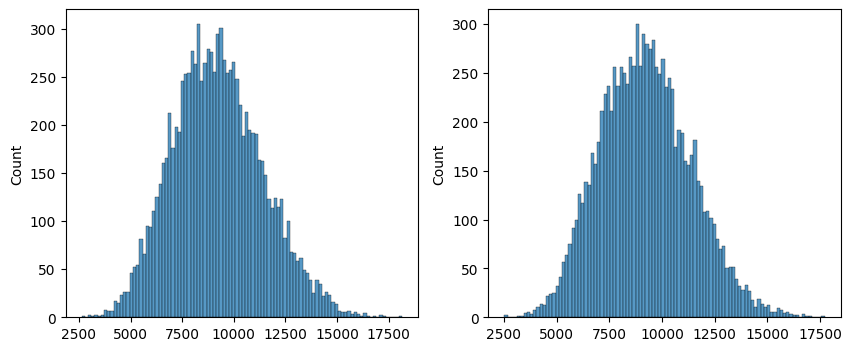

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(sample_5_unmarried,bins=100)
plt.subplot(1,2,2)
sns.histplot(sample_5_married,bins=100)

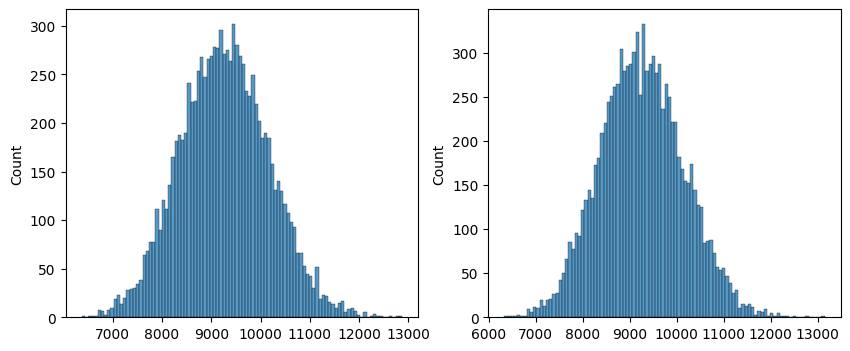

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(sample_30_unmarried,bins=100)
plt.subplot(1,2,2)
sns.histplot(sample_30_married,bins=100)
plt.show()

In [ ]:
sample_5_unmarried = np.array(sample_5_unmarried)
sample_5_married = np.array(sample_5_married)

In [ ]:
sample_30_unmarried = np.array(sample_30_unmarried)
sample_30_married = np.array(sample_30_married)

*Confidence interval with 5 sample CLT*

In [ ]:
print('Unmarried confidence Interval:')
confidence = 0.95
mu = sample_5_unmarried.mean()
std_dev = sample_5_unmarried.std()
n = 5
std_error = std_dev/n**0.5
x1,x2 = stats.norm.interval(confidence=confidence,loc=mu,scale=std_error)
print(f'{int(confidence*100)} out of 100 times user purchases lies between {(round(x1,2), round(x2,2))}')

Unmarried confidence Interval:
95 out of 100 times user purchases lies between (7327.41, 11140.6)


In [ ]:
print('Married confidence Interval:')
confidence = 0.95
mu = sample_5_married.mean()
std_dev = sample_5_married.std()
n = 5
std_error = std_dev/n**0.5
x1,x2 = stats.norm.interval(confidence=confidence,loc=mu,scale=std_error)
print(f'{int(confidence*100)} out of 100 times user purchases lies between {(round(x1,2), round(x2,2))}')

Married confidence Interval:
95 out of 100 times user purchases lies between (7352.69, 11112.68)


*Confidence interval with 30 sample CLT*

In [ ]:
print('Unmarried confidence Interval with sample size of 30:')
confidence = 0.95
mu = sample_30_unmarried.mean()
std_dev = sample_30_unmarried.std()
n = 5
std_error = std_dev/n**0.5
x1,x2 = stats.norm.interval(confidence=confidence,loc=mu,scale=std_error)
print(f'{int(confidence*100)} out of 100 times unmarried user purchases lies between {(round(x1,2), round(x2,2))}')

Unmarried confidence Interval with sample size of 30:
95 out of 100 times unmarried user purchases lies between (8482.95, 10061.71)


In [ ]:
print('Married confidence Interval with sample size of 30:')
confidence = 0.95
mu = sample_30_married.mean()
std_dev = sample_30_married.std()
n = 5
std_error = std_dev/n**0.5
x1,x2 = stats.norm.interval(confidence=confidence,loc=mu,scale=std_error)
print(f'{int(confidence*100)} out of 100 times married user purchases lies between {(round(x1,2), round(x2,2))}')

Married confidence Interval with sample size of 30:
95 out of 100 times married user purchases lies between (8485.9, 10042.32)


**Q5. Results when the same activity is performed for Age (10 Points)**

In [ ]:
s = df_copy.Age.unique()

In [ ]:
df_age = {}
for i in s:
  sample = []
  df_sample = df_copy[df_copy.Age == i]
  for j in range(5000):
    sample.append(np.mean(df_sample.Purchase.sample(5)))
  df_age[i] = sample

In [ ]:
df_age = pd.DataFrame(df_age)
df_age.head()

,0-17,55+,26-35,46-50,51-55,36-45,18-25
0,11101.2,9423.0,7595.4,12543.6,5367.8,12055.4,6064.8
1,11624.8,12870.8,7413.4,6196.2,12722.4,7262.0,7462.8
2,7780.4,9032.2,9162.2,9486.6,5848.6,7792.0,5159.8
3,9980.2,10375.8,8490.6,8117.6,13304.4,12662.6,10427.6
4,12544.4,7927.8,9028.0,9245.8,10881.0,10040.0,12010.4


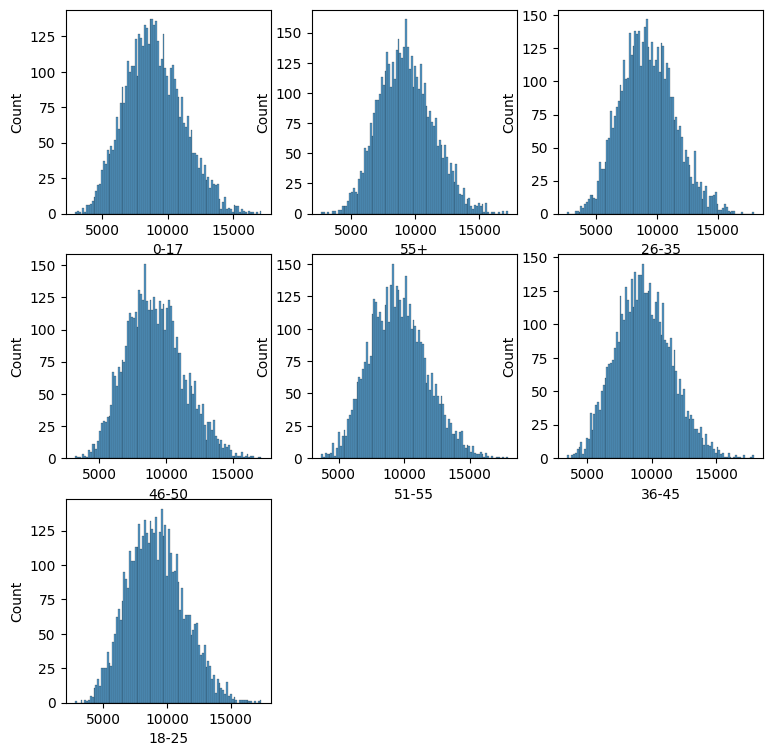

In [ ]:
plt.figure(figsize=(9,9))
for i in range(len(s)):
  plt.subplot(3,3,i+1)
  sns.histplot(df_age[s[i]],bins=100)

In [ ]:
def confidence_interval(k):
  print(f'age group of {k} confidence Interval:')
  confidence = 0.95
  mu = df_age[k].mean()
  std_dev = df_age[k].std()
  n = 5 #sample size
  std_error = std_dev/n**0.5
  x1,x2 = stats.norm.interval(confidence=confidence,loc=mu,scale=std_error)
  print(f'{int(confidence*100)} out of 100 times this age group {k} user purchases lies between {(round(x1,2), round(x2,2))}')

In [ ]:
for group in s:
  confidence_interval(group)

age group of 0-17 confidence Interval:
95 out of 100 times this age group 0-17 user purchases lies between (7025.77, 10876.13)
age group of 55+ confidence Interval:
95 out of 100 times this age group 55+ user purchases lies between (7451.96, 11150.31)
age group of 26-35 confidence Interval:
95 out of 100 times this age group 26-35 user purchases lies between (7293.67, 11169.16)
age group of 46-50 confidence Interval:
95 out of 100 times this age group 46-50 user purchases lies between (7284.2, 11076.58)
age group of 51-55 confidence Interval:
95 out of 100 times this age group 51-55 user purchases lies between (7626.37, 11462.84)
age group of 36-45 confidence Interval:
95 out of 100 times this age group 36-45 user purchases lies between (7468.84, 11271.61)
age group of 18-25 confidence Interval:
95 out of 100 times this age group 18-25 user purchases lies between (7220.07, 11094.25)


#<font color='purple'>5. Final Insights (10 Points) - Illustrate the insights based on exploration and CLT


#<font color='red'>Data Exploration

In [ ]:
age_group = df.Age.value_counts().index
for i in age_group:
  products = df[df.Age==i]['Product_ID'].value_counts(ascending=False).index[:2]
  print(f'For age group of {i} most purchased products are {products[0],products[1]}')

For age group of 26-35 most purchased products are ('P00265242', 'P00110742')
For age group of 36-45 most purchased products are ('P00025442', 'P00265242')
For age group of 18-25 most purchased products are ('P00265242', 'P00112142')
For age group of 46-50 most purchased products are ('P00265242', 'P00046742')
For age group of 51-55 most purchased products are ('P00265242', 'P00025442')
For age group of 55+ most purchased products are ('P00265242', 'P00080342')
For age group of 0-17 most purchased products are ('P00255842', 'P00145042')


In [ ]:
pd.crosstab(df.Age, df.Marital_Status)

Marital_Status,0,1
Age,,
0-17,15102,0
18-25,78544,21116
26-35,133296,86291
36-45,66377,43636
46-50,12690,33011
51-55,10839,27662
55+,7883,13621


In [ ]:
#Lets check if age group and marital status are dependent or independent of each other
#As both are categorical columns then it is best suggested to use chi2_contingency
significance = 0.05
H0 = 'Age group and marital status are independent'
Ha = 'Age group and marital status are dependent on each other'
chi_stat, p_val, dof, exp_freq = stats.chi2_contingency(pd.crosstab(df.Age, df.Marital_Status))
print(f'chi_stat:{chi_stat}, p_value:{p_val}')
hypo_result()

chi_stat:65038.31034963805, p_value:0.0
Reject H0, Conclusion: Age group and marital status are dependent on each other


In [ ]:
gender = df.Gender.value_counts().index
for i in gender:
  products = df[df.Gender==i]['Product_ID'].value_counts(ascending=False).index[:2]
  print(f'For gender of {i} most purchased products are {products[0],products[1]}')

For gender of M most purchased products are ('P00265242', 'P00025442')
For gender of F most purchased products are ('P00265242', 'P00220442')


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


**<font color='blue'>5.1 Comments on the distribution of the variables and relationship between them**

Actually there aren't enough enough variable which can form relationship and the only possible relationship is occupation vs purchase and which doesnot have much impact

**<font color='blue'>5.2 Comments for each univariate and bivariate plots**

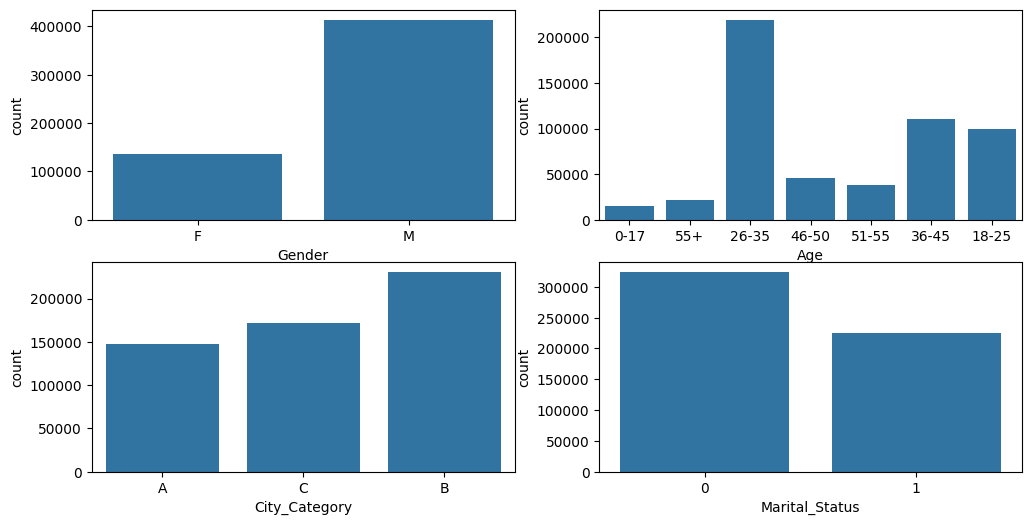

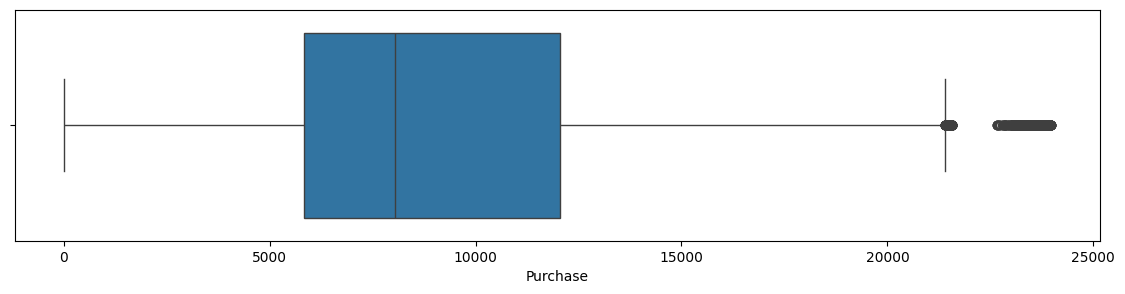

**Gender**: Here according to number of orders the bar graph is plotted not by the actual number of males & females and this means men have ordered most of the products in black friday sale.

**Age**: We dont have the data as the user age where it was like bins and most of the users come under 18-45 years of age where it is morethan 65% of all the orders of male and female users

**City**: We have 3 city categories and in them B and C has done morethan 75% of orders and is less only when compared with other cities

**Martial_status**: Unmarried users have orders morethan married users



*   Unanimously men dominate female on number of purchase made on black friday
*   Maximum number of customers lie in age group of 26-35
* Users of City B have done max purchases
* Unmarried users bought more then married users
* Unmarried women and men purchased more than married women and men


**<font color='blue'>5.3 Comments on different variables when generalizing it for Population**

In this WallMart dataset only Purchase variable is used most of the times so.

Concentrate on city C and city B where more than 75% of the purchases happen

User_ID: Amount spent : no. of orders

* 1004277: 10536909     : 979

* 1001680: 8699596      : 1026

Here one most important thing is ID ending with 680 have orders more items but its revenue is not the highest and vice versa


#<font color='purple'>6. Recommendations (10 Points)
**Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand**

A total of **5891** unique customers have ordered on black friday sale on wallmart
where, **71%** (4225)of them were **male** The most purchasing age group is between **18-45 years males** with about **58% of all the orders**


Average amount spent by men and women

* F    8734.56
* M    9437.52

By this info wall mart should **concentrate on male customers** with the age group of 18-45 years where this is mostly earning age and they are young so they have no restrictions

**Unmarried** users **bought morethan** married useres this might be due to many factors like other financial commitments
`So to overcome this situation it is adviced to advertise about black friday sale atleast one month that to one week before the salary date so that they can manage their savings likely`

Users in **CITY B** have done maximum transactions morethan 40% of orders have come from this city

**Final recommendation:**
Concentarate more on men with age groups of 18-45 years in city A and that is by increasing advertising, offers, fast delivery options so by that in future sales in city A also improves in number of purchases and might be equally have share with other cities which were already doing good

As city B is the most ordered then it is best to continue the same and increase or change the strategy on trial and error basis